In [5]:
# Steam Game Reviews
# Parin Pandya

# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

import string
import collections
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
nltk.download('vader_lexicon')

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Mounted at /content/drive


In [6]:
# load the dataset
csv_path = "/content/drive/MyDrive/CMPT318/Project/archive/train_gr/train.csv"
df = pd.read_csv(csv_path)


In [7]:
from tkinter.constants import N
# Filter and Clean reviews
def clean_text(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]', ' ', text)
  return text

revs_col_name = df.columns[3]
reviews = df[revs_col_name]
#print(reviews)

clean_revs = [clean_text(review) for review in reviews]
tokenized_reviews = [word_tokenize(review) for review in clean_revs]

english_words = set(words.words())
stop_words = set(stopwords.words('english'))  # get English stop words

filtered_revs = [' '.join([word for word in review if word in english_words and word not in stop_words])
                  for review in tokenized_reviews]

cleaned_df = pd.DataFrame({revs_col_name: filtered_revs})
cleaned_df.head()


,user_review
0,hearing creepy pause moment write review wait ...
1,best game better sam pepper account need play ...
2,iffy know play easy master made floor due cert...
3,great game fun colorful side note though getti...
4,many cute tag right next horror tag steam firs...


In [8]:
# to get the total number of words in the reviews column
total_words = cleaned_df[revs_col_name].apply(lambda x: len(str(x).split())).sum()
#print("Total number of words in the DataFrame:", total_words)

all_words = ' '.join (cleaned_df[revs_col_name]).split()
word_count = Counter(all_words)
common_words = word_count.most_common()

# gives the count of all the common words
#for word, count in common_words[:1000]:
#  print(f"{word}: {count} times")

sia = SentimentIntensityAnalyzer()

# Assign scores to positive and negative words based on sentiment analysis
word_scores = {}
for word, count in common_words:
    sentiment_score = sia.polarity_scores(word)['compound']
    if sentiment_score > 0:
        word_scores[word] = sentiment_score
    elif sentiment_score < 0:
        word_scores[word] = sentiment_score

# Print word scores
#for word, score in word_scores.items():
#    print(f"{word}: {score}")


In [9]:
# Assign scores to positive and negative words based on sentiment analysis
positive_words = [word for word, count in common_words if sia.polarity_scores(word)['compound'] > 0]
negative_words = [word for word, count in common_words if sia.polarity_scores(word)['compound'] < 0]

# Print positive words
#print("Positive words:")
positive_word_cloud = positive_words
#print(positive_word_cloud)

# Print negative words
#print("\nNegative words:")
negative_word_cloud = negative_words
#print(negative_word_cloud)

combined_reviews = []

for idx, row in cleaned_df.iterrows() and df.iterrows():
    review_words = set(row[revs_col_name].split())
    positive_in_review = review_words.intersection(positive_words)
    negative_in_review = review_words.intersection(negative_words)

    if positive_in_review or negative_in_review:
        combined_reviews.append((row['title'], row[revs_col_name], list(positive_in_review), list(negative_in_review)))

review_scores = []

# Print positive reviews and negative reviews
for title, review, positive_words, negative_words in combined_reviews:
    positive_score_sum = sum(sia.polarity_scores(word)['compound'] for word in positive_words)
    negative_score_sum = sum(sia.polarity_scores(word)['compound'] for word in negative_words)
    total_score = positive_score_sum - negative_score_sum

    review_scores.append((title, review, total_score))

    """
    print(f"Game: {title}")
    print(f"Review: {review}")
    print(f"Positive Words: {positive_words}")
    print(f"Negative Words: {negative_words}")
    print(f"Positive Score Sum: {positive_score_sum}")
    print(f"Negative Score Sum: {negative_score_sum}")
    print(f"Total Review Score: {total_score}")
    print()
    """

sorted_revs = sorted(review_scores, key=lambda x: x[2], reverse=True)
highest_revs = sorted_revs[:50]

games = []

print(f"\nGames with the highest review total scores: ")
for title, review, total_score in highest_revs:
    print(f"Game: {title}")
    games.append(title)
    print(f"Total Score: {total_score}")
    print()

g_count = 0
print("\nList of Games with the highest review total scores: ")
print(games)
for i in games:
  g_count = g_count + 1

print(g_count)



Games with the highest review total scores: 
Game: World of Guns: Gun Disassembly
Total Score: 27.081400000000002

Game: Dota 2
Total Score: 26.2461

Game: Heroes & Generals
Total Score: 24.0449

Game: War Thunder
Total Score: 23.861900000000006

Game: SMITE®
Total Score: 23.5738

Game: AdventureQuest 3D
Total Score: 23.526699999999998

Game: Bless Online
Total Score: 23.1355

Game: Heroes & Generals
Total Score: 23.0935

Game: Robocraft
Total Score: 22.8904

Game: Robocraft
Total Score: 22.8904

Game: Path of Exile
Total Score: 22.648799999999998

Game: Fallout Shelter
Total Score: 22.262899999999995

Game: Team Fortress 2
Total Score: 22.103700000000003

Game: Robocraft
Total Score: 21.8562

Game: SMITE®
Total Score: 21.6384

Game: AdventureQuest 3D
Total Score: 21.396500000000003

Game: Fractured Space
Total Score: 21.174100000000003

Game: Robocraft
Total Score: 20.862900000000003

Game: SMITE®
Total Score: 20.810299999999998

Game: PlanetSide 2
Total Score: 20.3247

Game: EverQue

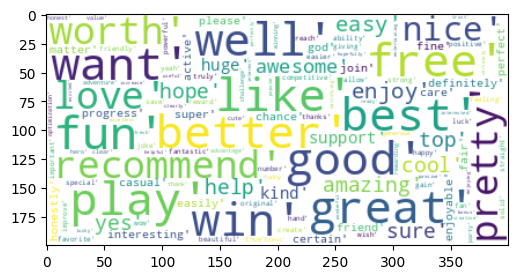

In [11]:
# Creating a word cloud

# positive words
wordcloud = WordCloud(max_font_size=40, background_color='white', stopwords=stop_words).generate(str(positive_word_cloud))
plt.figure(figsize=(15,3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


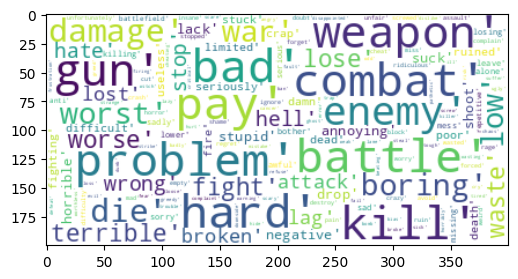

In [12]:
# negative words
wordcloud = WordCloud(max_font_size=40, background_color='white', stopwords=stop_words).generate(str(negative_word_cloud))
plt.figure(figsize=(15,3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


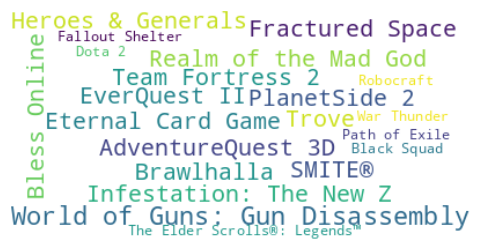

In [13]:
# games with the highest reviews word cloud

games_cloud = {game: total_score for game, _, total_score in highest_revs}

#games_cloud = ' '.join([f'"{game}"' for game in games])
wordcloud = WordCloud(max_font_size=80, background_color='white').generate_from_frequencies(games_cloud)
plt.figure(figsize=(15,3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


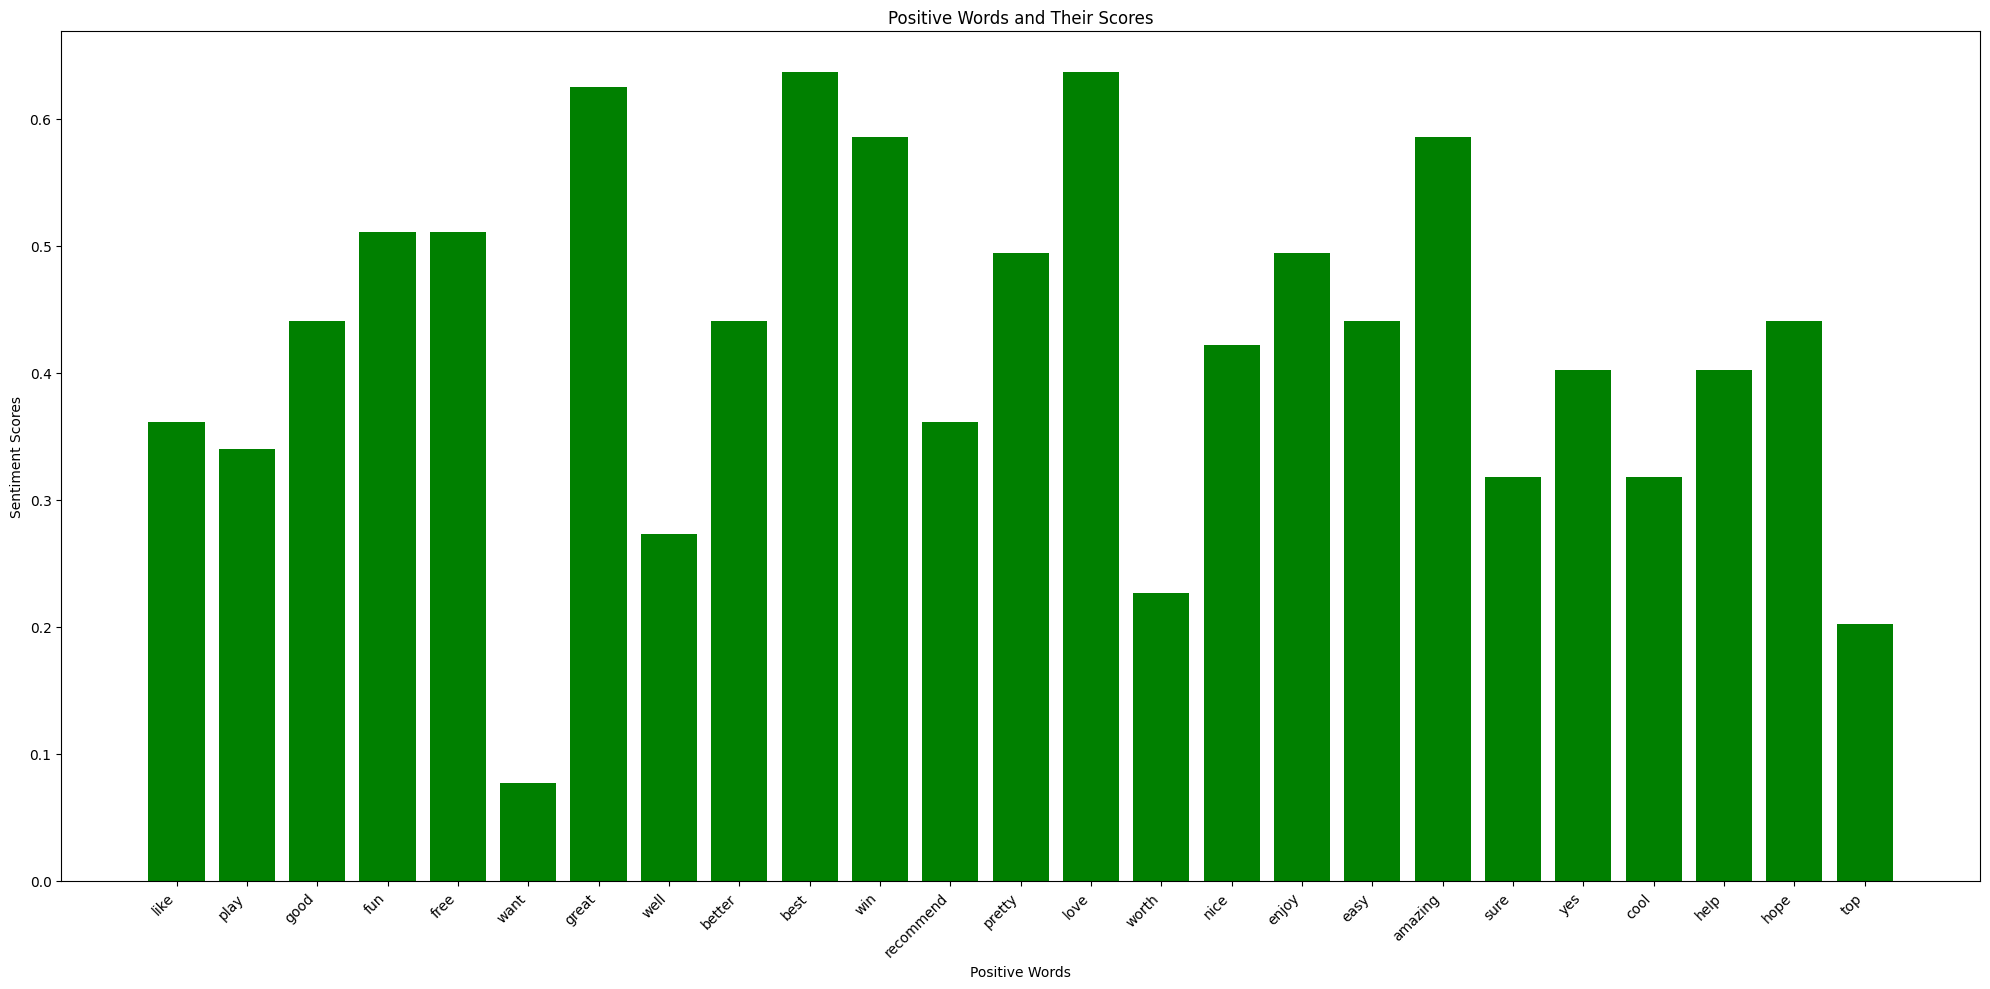

In [14]:
# Creating a bar chart for positive words
positive_scores = {word: score for word, score in word_scores.items() if score > 0}

#for word, score in positive_scores.items():
#  print(f"{word}: {score}")

positive_w = list(positive_scores.keys())
positive_s = list(positive_scores.values())

plt.figure(figsize=(20, 10))
plt.bar(positive_w[:25], positive_s[:25], color='green')
plt.xlabel('Positive Words')
plt.ylabel('Sentiment Scores')
plt.title('Positive Words and Their Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


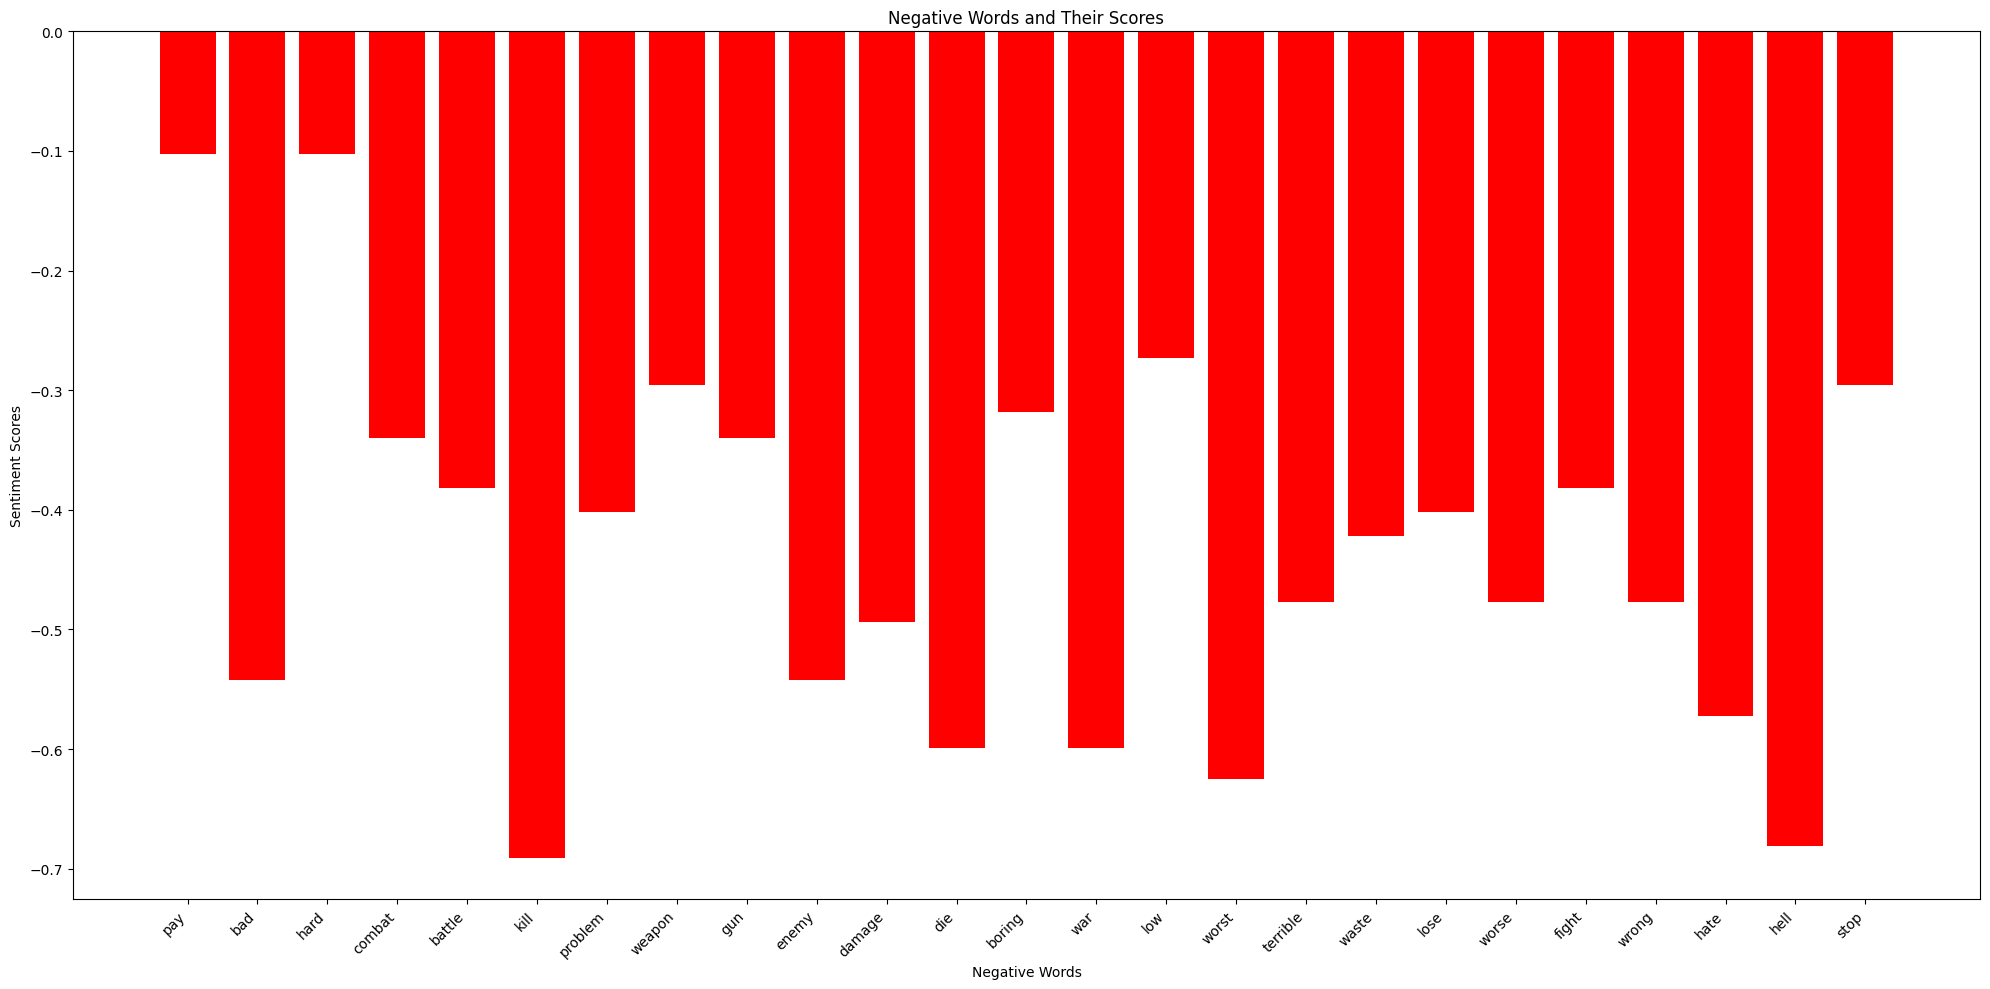

In [15]:
# Creating a bar chart for negative words
negative_scores = {word: score for word, score in word_scores.items() if score < 0}

#for word, score in negative_scores.items():
#  print(f"{word}: {score}")

negative_w = list(negative_scores.keys())
negative_s = list(negative_scores.values())

plt.figure(figsize=(20, 10))
plt.bar(negative_w[:25], negative_s[:25], color='red')
plt.xlabel('Negative Words')
plt.ylabel('Sentiment Scores')
plt.title('Negative Words and Their Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


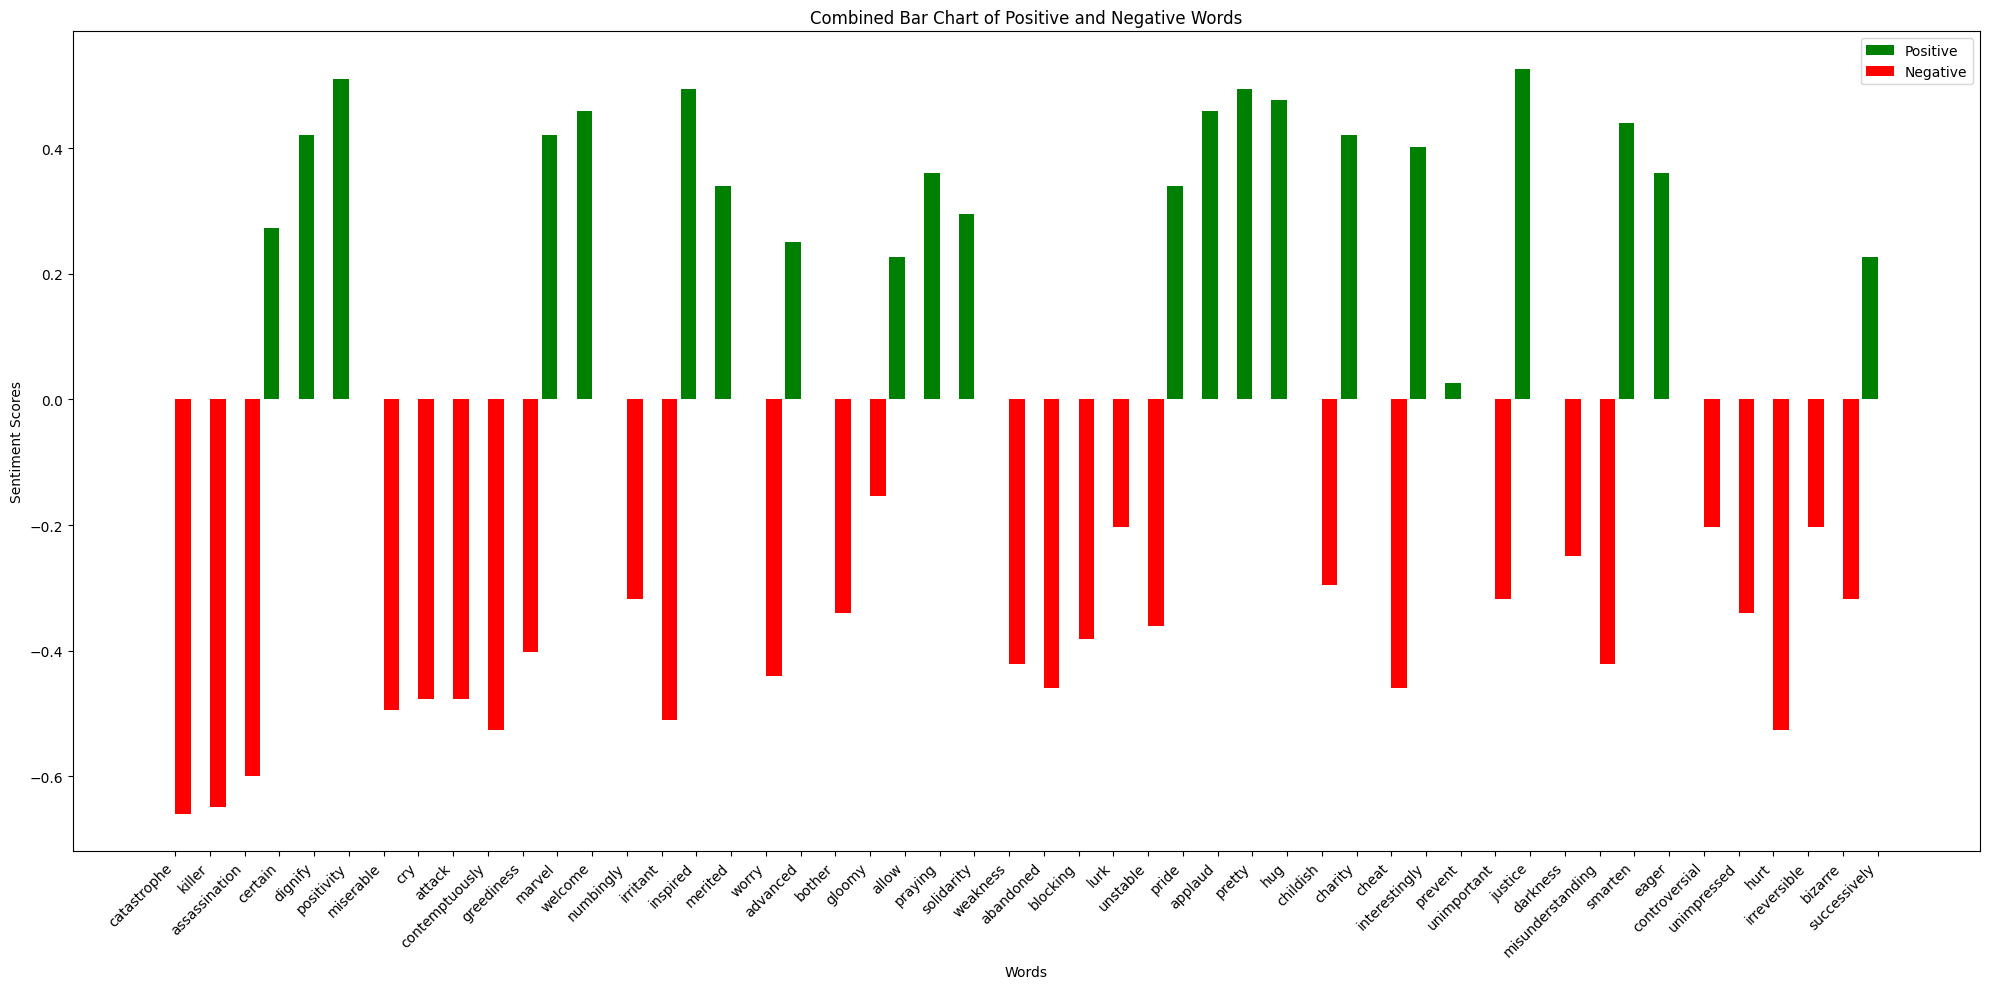

In [19]:
# Creating a combined bar chart

all_words = list(set(positive_word_cloud).union(negative_word_cloud))

width = 0.45  # Width of each bar
ind = np.arange(len(all_words[:50]))  # X-axis indices

fig, ax = plt.subplots(figsize=(20, 10))

# Plot positive words and scores
rects1 = ax.bar(ind - width/2, [positive_scores.get(word, 0) for word in all_words[:50]], width, label='Positive', color='green')

# Plot negative words and scores
rects2 = ax.bar(ind + width/2, [negative_scores.get(word, 0) for word in all_words[:50]], width, label='Negative', color='red')

# Set labels, title, and legend
ax.set_xlabel('Words')
ax.set_ylabel('Sentiment Scores')
ax.set_title('Combined Bar Chart of Positive and Negative Words')
ax.set_xticks(ind)
ax.set_xticklabels(all_words[:50], rotation=45, ha='right')
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()